# Heatmaps

In [39]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from nltk.tokenize import word_tokenize 
from nltk.collocations import *
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import savefig
from matplotlib import rcParams

In [40]:
papers = pd.read_csv("table_1_eligible.csv", index_col=[0]) #it reads the table derived from medline file

In [41]:
papers.head(5)

,Journal,Title,Authors,Year,Abstract
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",['Baek Kiwoon' 'Choi Ahyoung' 'Lee Yung Mi' 'L...,2018,"A Gram-stain-negative, non-motile, oxidase- an..."
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",['Ruan Chu-Jin' 'Zheng Xiao-Wei' 'Wang Jian' '...,2018,"A novel aerobic, Gram-stain-negative bacterium..."
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,['Kaminski Michal A' 'Sobczak Adam' 'Spolnik G...,2018,"An aerobic, Gram-stain-negative, rod-shaped, n..."
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",['Sakamoto Mitsuo' 'Ikeyama Nao' 'Kunihiro Tad...,2018,"Two novel, obligately anaerobic, Gram-stain-ne..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",['Qin Jiayuan' 'Hu Yiyi' 'Feng Yu' 'Lv Xiaoju'...,2018,"A novel Acinetobacter strain, WCHAc060041(T), ..."


In [42]:
def convert2acronym(text):
    substitutions = {"average nucleotide identity":"ani",
                     "in silico dna-dna hybridization":"dddh",
                     "digital dna-dna hybridization":"dddh",
                     "genome-to-genome distance calculator": "ggdc",
                     "genome to genome distance calculator": "ggdc",
                     "genome-to-genome distance":"ggd",
                     "genome to genome distance":"ggd",
                     "multi locus sequence typing":"mlst",
                     "multi locus sequence analysis":"mlsa"}
    for i,j in substitutions.items():
        text = text.lower().replace(i,j)
    return(text)

papers["Abstract"] = papers["Abstract"].apply(convert2acronym)

In [43]:
abstracts_full = papers[["Abstract", "Year"]]


In [44]:
stop = stopwords.words('english')


In [45]:
def freq_words_by_year(year): #function that counts the number of words per year
    abstracts_year = abstracts_full[abstracts_full["Year"] == year]["Abstract"]
    abstracts_year_cat = abstracts_year.str.cat(sep=" ")
    
    punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
    transtab = str.maketrans(dict.fromkeys(punct, ''))
    abstracts_year_no_punct = abstracts_year_cat.translate(transtab)
    
    stop_words = stopwords.words('english')
    word_tokens_year = word_tokenize(abstracts_year_no_punct.lower()) 
    
    filtered_sentence_year = [] 
    for w in word_tokens_year: 
        if w not in stop_words: 
            filtered_sentence_year.append(w)
    
    #lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_year = []
    
    
    for w in filtered_sentence_year:
        lemmatized_w = wordnet_lemmatizer.lemmatize(w)
        lemmatized_year.append(lemmatized_w)
            
    freq_dict = Counter(lemmatized_year)

    freq_df = pd.DataFrame.from_dict(freq_dict, orient='index').reset_index()
    freq_df.columns = ["word", "freq"]
    
    freq_df.to_csv("{}_word_freq.csv".format(year))


In [46]:
for i in range(2001,2019):
    freq_words_by_year(i)

In [47]:
#frequency from all
abstracts_all = abstracts_full["Abstract"]
abstracts_cat = abstracts_all.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
abstracts_no_punct = abstracts_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens = word_tokenize(abstracts_no_punct.lower()) 

filtered_sentence = [] 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_all = []


for w in filtered_sentence:
    lemmatized_w = wordnet_lemmatizer.lemmatize(w)
    lemmatized_all.append(lemmatized_w)


freq_dict = Counter(lemmatized_all)

freq_df = pd.DataFrame.from_dict(freq_dict, orient='index').reset_index()
freq_df.columns = ["word", "all"]

freq_df.to_csv("all_word_freq.csv")


In [48]:
df_2001 = pd.read_table('2001_word_freq.csv', sep=',', index_col=0)
df_2002 = pd.read_table('2002_word_freq.csv', sep=',', index_col=0)
df_2003 = pd.read_table('2003_word_freq.csv', sep=',', index_col=0)
df_2004 = pd.read_table('2004_word_freq.csv', sep=',', index_col=0)
df_2005 = pd.read_table('2005_word_freq.csv', sep=',', index_col=0)
df_2006 = pd.read_table('2006_word_freq.csv', sep=',', index_col=0)
df_2007 = pd.read_table('2007_word_freq.csv', sep=',', index_col=0)
df_2008 = pd.read_table('2008_word_freq.csv', sep=',', index_col=0)
df_2009 = pd.read_table('2009_word_freq.csv', sep=',', index_col=0)
df_2010 = pd.read_table('2010_word_freq.csv', sep=',', index_col=0)
df_2011 = pd.read_table('2011_word_freq.csv', sep=',', index_col=0)
df_2012 = pd.read_table('2012_word_freq.csv', sep=',', index_col=0)
df_2013 = pd.read_table('2013_word_freq.csv', sep=',', index_col=0)
df_2014 = pd.read_table('2014_word_freq.csv', sep=',', index_col=0)
df_2015 = pd.read_table('2015_word_freq.csv', sep=',', index_col=0)
df_2016 = pd.read_table('2016_word_freq.csv', sep=',', index_col=0)
df_2017 = pd.read_table('2017_word_freq.csv', sep=',', index_col=0)
df_2018 = pd.read_table('2018_word_freq.csv', sep=',', index_col=0)

In [49]:
from functools import reduce

dfs = [df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018]
df_final = reduce(lambda left,right: pd.merge(left,right,on='word',how='outer'), dfs)
df_final.columns = ["word", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018" ]




In [50]:
df_final = df_final.set_index("word")
df_final

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
word,,,,,,,,,,,,,,,,,,
polyphasic,35.0,37.0,66.0,80.0,109.0,142.0,189.0,164.0,178.0,150.0,173.0,155.0,301.0,262.0,322.0,298.0,319.0,248.0
approach,16.0,21.0,24.0,27.0,44.0,60.0,83.0,65.0,99.0,82.0,98.0,97.0,174.0,131.0,159.0,181.0,167.0,148.0
used,16.0,32.0,32.0,31.0,38.0,22.0,27.0,35.0,38.0,27.0,26.0,39.0,50.0,32.0,50.0,32.0,32.0,23.0
establish,2.0,1.0,2.0,5.0,4.0,1.0,4.0,6.0,2.0,2.0,3.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0
taxonomic,47.0,59.0,72.0,91.0,106.0,131.0,167.0,147.0,168.0,153.0,167.0,156.0,254.0,221.0,256.0,248.0,236.0,170.0
position,23.0,25.0,30.0,45.0,48.0,70.0,73.0,69.0,79.0,91.0,73.0,84.0,113.0,88.0,112.0,118.0,98.0,75.0
two,118.0,148.0,142.0,196.0,237.0,245.0,278.0,191.0,267.0,215.0,239.0,245.0,425.0,401.0,454.0,382.0,446.0,322.0
actinomycete,14.0,10.0,15.0,29.0,28.0,34.0,32.0,38.0,54.0,38.0,57.0,44.0,57.0,49.0,68.0,56.0,35.0,41.0
isolated,170.0,201.0,225.0,281.0,340.0,393.0,470.0,462.0,500.0,490.0,509.0,544.0,834.0,745.0,887.0,763.0,846.0,634.0


In [51]:
n_year = pd.DataFrame(abstracts_full["Year"].value_counts()).reset_index()
n_year.columns = ["Year", "Frequency"]
n_year = n_year.sort_values(by="Year")
n_year_ed = n_year.set_index("Year")
n_year_transposed = n_year_ed.transpose()
n_year_transposed.columns = ["2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
n_year_transposed.to_csv("articles_per_year.csv", sep="\t")

In [52]:
relative = df_final.div(n_year_transposed.iloc[0]) #it calculates the relative frequency of the terms per year

In [53]:
relative

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
word,,,,,,,,,,,,,,,,,,
polyphasic,0.196629,0.160173,0.250951,0.246154,0.292225,0.342169,0.379518,0.340956,0.339048,0.286260,0.327652,0.278777,0.356635,0.347020,0.358575,0.385013,0.368786,0.384496
approach,0.089888,0.090909,0.091255,0.083077,0.117962,0.144578,0.166667,0.135135,0.188571,0.156489,0.185606,0.174460,0.206161,0.173510,0.177060,0.233850,0.193064,0.229457
used,0.089888,0.138528,0.121673,0.095385,0.101877,0.053012,0.054217,0.072765,0.072381,0.051527,0.049242,0.070144,0.059242,0.042384,0.055679,0.041344,0.036994,0.035659
establish,0.011236,0.004329,0.007605,0.015385,0.010724,0.002410,0.008032,0.012474,0.003810,0.003817,0.005682,0.003597,0.003555,0.003974,0.011136,0.010336,0.008092,0.012403
taxonomic,0.264045,0.255411,0.273764,0.280000,0.284182,0.315663,0.335341,0.305613,0.320000,0.291985,0.316288,0.280576,0.300948,0.292715,0.285078,0.320413,0.272832,0.263566
position,0.129213,0.108225,0.114068,0.138462,0.128686,0.168675,0.146586,0.143451,0.150476,0.173664,0.138258,0.151079,0.133886,0.116556,0.124722,0.152455,0.113295,0.116279
two,0.662921,0.640693,0.539924,0.603077,0.635389,0.590361,0.558233,0.397089,0.508571,0.410305,0.452652,0.440647,0.503555,0.531126,0.505568,0.493540,0.515607,0.499225
actinomycete,0.078652,0.043290,0.057034,0.089231,0.075067,0.081928,0.064257,0.079002,0.102857,0.072519,0.107955,0.079137,0.067536,0.064901,0.075724,0.072351,0.040462,0.063566
isolated,0.955056,0.870130,0.855513,0.864615,0.911528,0.946988,0.943775,0.960499,0.952381,0.935115,0.964015,0.978417,0.988152,0.986755,0.987751,0.985788,0.978035,0.982946


# Word classifier

In [54]:
pd_words = pd.read_csv("all_word_freq.csv", index_col=0)
pd_words.sort_values(by="all", inplace=True, ascending=False)
pd_words.head(10)

,word,all
13,strain,60295
23,genus,18938
36,specie,18437
19,sequence,17319
27,type,15272
18,gene,14448
16,16,14142
97,novel,13666
17,rrna,13280
101,nov,12942


In [55]:
def classify_words(word):
    sites = ['soil', "sea", "sediment", 'water', "seawater", 'lake', 'human', 'plant', "rhizosphere", 'coast', 
             "root", "forest", "ocean", "freshwater", "ginseng", "deep-sea", "wastewater", "bay", "river",
             "hydrothermal", "blood", "desert", "pond", "mangrove", "faeces", "mountain", "sand", "saltern", "vent",
             "wetland", "oil", "oral", "beach", "pig", "glacier", "fish", "mat", "coral", "alga", "legume", "sponge",
             "farm", "milk", "paddy", "waste", "food", "cave", "peninsula", "sewage", "oil-contaminated", "dog",
             "mouse", "mud", "termite", "seashore", "garden", "gulf", "seal", "ice", "cloaca", "oilfield", "wound",
             "seafood", "intestine", "estuary", "chimney", "lagoon", "sputum", "seaweed", "cattle", "lesion", "brine",
             "valley", "archipelago", "groundwater", "bark", "geothermal", "cow", "flower", "potato", "chicken"]
    countries = ["afghanistan","albania","algeria","andorra","angola", "antarctica", "antigua and barbuda","argentina",
                 "armenia","australia","austria","azerbaijan","the bahamas","bahrain","bangladesh","barbados",
                 "belarus","belgium","belize","benin","bhutan","bolivia","bosnia and herzegovina","botswana",
                 "brazil","brunei","bulgaria","burkina_faso","burundi","cabo verde","cambodia","cameroon","canada",
                 "central african republic","chad","chile","china","colombia","comoros",
                 "democratic republic of the congo","republic of the congo","costa_rica","côte d’ivoire","croatia",
                 "cuba","cyprus","czech_republic","denmark","djibouti","dominica","dominican_republic",
                 "east timor (timor-leste)","ecuador","egypt","el salvador","equatorial guinea","eritrea",
                 "estonia","eswatini","ethiopia","fiji","finland","france","gabon","the gambia","georgia",
                 "germany","ghana","greece","grenada","guatemala","guinea","guinea-bissau","guyana","haiti",
                 "honduras","hungary","iceland","india","indonesia","iran","iraq","ireland","israel","italy",
                 "jamaica","japan","jordan","kazakhstan","kenya","kiribati", "korea","kosovo",
                 "kuwait","kyrgyzstan","laos","latvia","lebanon","lesotho","liberia","libya","liechtenstein",
                 "lithuania","luxembourg","madagascar","malawi","malaysia","maldives","mali","malta",
                 "marshall islands","mauritania","mauritius","mexico","federated states of micronesia","moldova",
                 "monaco","mongolia","montenegro","morocco","mozambique","myanmar (burma)","namibia","nauru",
                 "nepal","netherlands","new_zealand","nicaragua","niger","nigeria","north macedonia","norway",
                 "oman","pakistan","palau","panama","papua new guinea","paraguay","peru","philippines","poland",
                 "portugal","qatar","romania","russia","rwanda","saint kitts and nevis","saint lucia",
                 "saint vincent and the grenadines","samoa","san marino","sao tome and principe","saudi_arabia",
                 "senegal","serbia","seychelles","sierra leone","singapore","slovakia","slovenia",
                 "solomon islands","somalia","africa","spain","sri lanka","sudan","south sudan","suriname",
                 "sweden","switzerland","syria","taiwan","tajikistan","tanzania","thailand","togo","tonga",
                 "trinidad and tobago","tunisia","turkey","turkmenistan","tuvalu","uganda","ukraine",
                 "united arab emirates","uk","usa","uruguay","uzbekistan","vanuatu","vatican city","venezuela",
                 "vietnam","yemen","zambia","zimbabwe"]
    metabolisms = ['aerobic', 'anaerobic', "anaerobe", "microaerophilic", 'halophilic', "alkaliphilic", 'thermophilic', 
                   "mesophilic", "psychrophilic",'heterotrophic', "halotolerant", "photosynthetic", "neutrophilic",
                   "phototrophic", "autotrophic", "chemolithoautotrophic","chemoheterotrophic", "chemo-organotrophic",
                   "acidophilic","nitrogen-fixing", 'catalase-positive', 'catalase-negative', 'oxidase-positive', 
                   "oxidase-negative", "methylotrophic", "sulfur-oxidizing", "cellulolytic", "thermotholerant",
                   "methanogenic", "aerobe", "heterotroph", "agarolytic", "haloalkaliphilic"]
    structures = ['rod-shaped', 'rod', "short-rod-shaped", "ovoid", 'coccoid', "coccoid-shaped", "cocci", 
                  "coccus-shaped", "coccus", "mycelium", "pleomorphic", "filamentous",'gram-negative',
                  'gram-stain-negative', 'gram-staining-negative', "gram-reaction-negative", 'gram-positive', 
                  "gram-staining-positive", 'gram-stain-positive', "gram-reaction-positive", 
                  "gram-positive-staining", "gram-variable", "oval-shaped",
                  "non-motile", 'motile', "non-gliding", "non-flagellated", "nonmotile", 'non-spore-forming', 
                  'endospore-forming', 'spore-forming', "non-sporulating", "non-endospore-forming"]
    methods_type = ["phylogenetic","phenotypic", "chemotaxonomic","genomic", "genotypic"]
    markers = ["rrna",'gyrb', 'rpob', 'reca', 'atpd', 'rpoa', 'rpod', 'glnii', 'dnak', "recn", "nifh", "hsp60", 
               "hsp65", "groel", "nodc", "atpa", "infb", "rrs", "glta", "ftsz", "gyra"]
    methods_phenotypic = ["physiological", "biochemical", "morphological", "morphology", "api", "biolog"]
    methods_chemotaxonomic = ["fatty", "lipid", "quinone", "peptidoglycan", "polyamines", "maldi-tof"]
    methods_genomic = ["gc","dna-dna", "dnadna", "ddh", "whole-genome", "genome", "mlsa", "mlst", "ribotyping",  
                       "ani", "anib", "ggd", "dddh","gani", "aflp", "box-pcr"]
    culture_collections = ["dsm", "kctc", "jcm", "lmg", "yim", "atcc", "nbrc", "ccug", "cgmcc", "kacc", "kmm",
                           "cctcc", "cect", "nrrl", "ccm", "ncimb", "bcrc", "ccbau", "cau", "mccc", "kccm", "mtcc", 
                           "jsm", "bcc", "iam", "trm", "scsio", "klbmp", "cpcc", "accc", "nric", "immib", "imsnu", 
                           "ifm", "nctc", "hambi", "nccb", "cfh", "pamc", "cfbp", "cicc", "thg", "usda", "tistr",
                           "wcc", "icmp", "mbrl", "ibrc-m", "ncaim", "jamm"]
    if word in sites:
        return("site")
    elif word in countries:
        return("country")
    elif word in metabolisms:
        return("metabolism")
    elif word in structures:
        return("structure")
    elif word in methods_type:
        return("methods_type")
    elif word in markers:
        return("marker")
    elif word in methods_phenotypic:
        return("methods_phenotypic")
    elif word in methods_chemotaxonomic:
        return("methods_chemotaxonomic")
    elif word in methods_genomic:
        return("methods_genomic")
    elif word in culture_collections:
        return("culture_collection")
    else:
        return("not_classified")

In [56]:
pd_words["classification"] = pd_words["word"].apply(classify_words)
pd_words.to_csv("words_classification.csv", sep="\t")

# Genus

In [57]:
genus = relative.loc[['bacillus', 'streptomyces', 'paenibacillus', 'flavobacterium', 'pseudomonas', 'lactobacillus', 'sphingomonas', 'chryseobacterium', 'mycobacterium', 'pedobacter', 'vibrio', 'halomonas', 'clostridium', 'nocardia', 'microbacterium', 'burkholderia', 'micromonospora', 'streptococcus', 'deinococcus', 'lysobacter']]

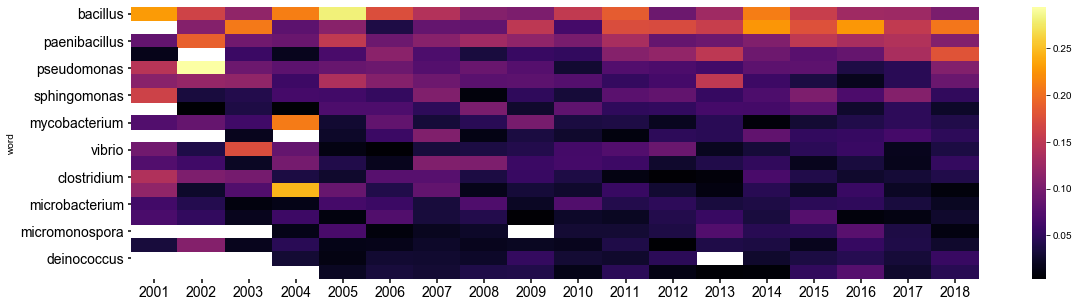

In [58]:
#optional for the paper
fig, ax = plt.subplots(figsize=(19,5))
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.heatmap(genus, cmap="inferno")

# Culture collection

In [59]:
culture_collection = relative.loc[["dsm", "kctc", "jcm", "lmg", "yim", "atcc", "nbrc", "ccug", "cgmcc", "kacc"]]

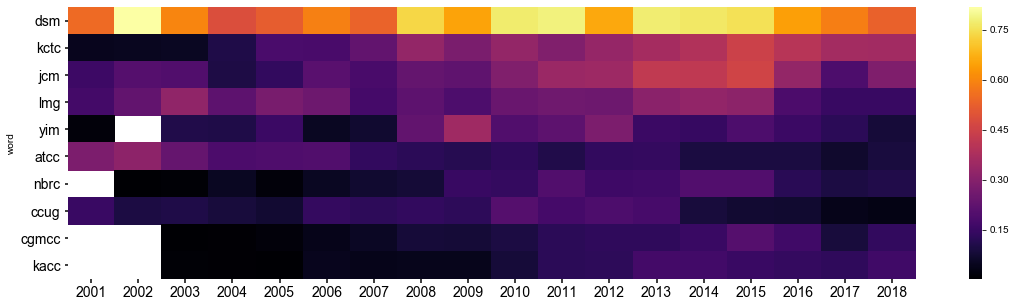

In [60]:
#optional for the paper
fig, ax = plt.subplots(figsize=(19,5))
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.heatmap(culture_collection, cmap="inferno")

# Figure 6 - Origin

In [61]:
country_env = relative.loc[['soil', "sediment", "sea", 'water', 'lake', "seawater", 'plant', 'human', "root", "rhizosphere",'china', 'korea', 'japan', 'india', 'taiwan', 'spain', "antarctica", 'usa', "thailand", 'russia',]]


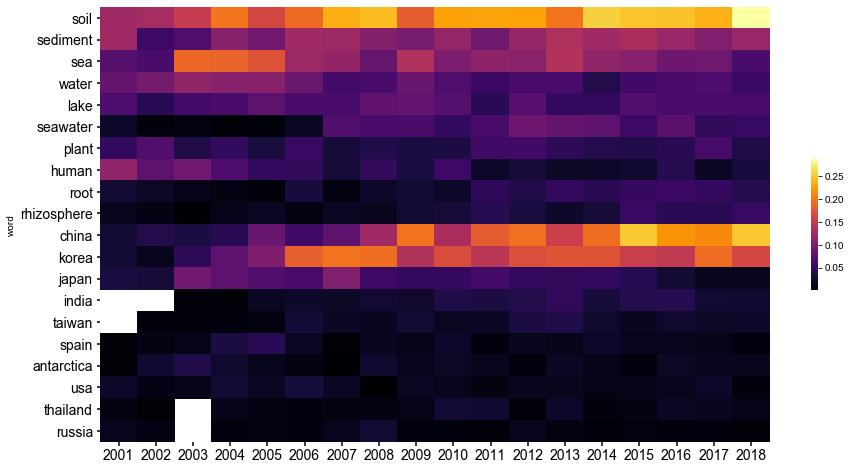

In [62]:
fig, ax = plt.subplots(figsize=(15,8))
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.heatmap(country_env, cmap="inferno", cbar_kws = {"shrink": 0.3})
fig.savefig("origin.svg")

# Figure 8 - Methods

In [63]:
methods = relative.loc[["phylogenetic","phenotypic", "chemotaxonomic","genomic", "genotypic", "rrna", "gyrb", "rpob", "reca", "physiological", "biochemical", "morphological", "fatty", "lipid", "quinone", "peptidoglycan", "gc","dna-dna", "genome", "whole-genome", "mlsa", "ani", "dddh"]]

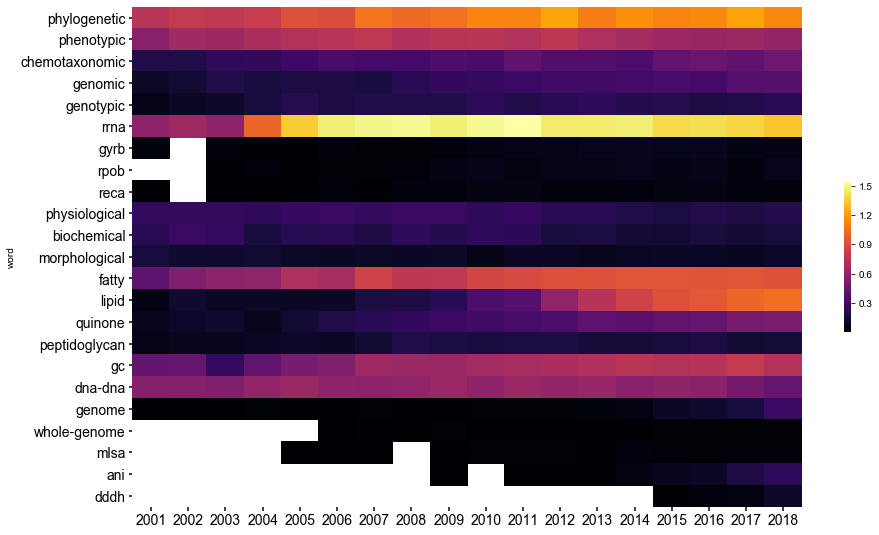

In [64]:
fig, ax = plt.subplots(figsize=(15,9.2))
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.heatmap(methods, cmap="inferno", cbar_kws = {"shrink": 0.3})
fig.savefig("tests.svg")

# Figure 7 - Phenotype

In [65]:
phenotype = relative.loc[["aerobic","anaerobic","halophilic","halotolerant","alkaliphilic","acidophilic","catalase-positive","catalase-negative","oxidase-positive","oxidase-negative","thermophilic","mesophilic","psychrophilic","heterotrophic","chemoheterotrophic","photosynthetic","phototrophic","nitrogen-fixing","rod-shaped","rod","mycelium","coccoid","gram-negative","gram-stain-negative","gram-staining-negative","gram-positive","gram-stain-positive","non-motile","motile","non-spore-forming","endospore-forming","spore-forming"]]

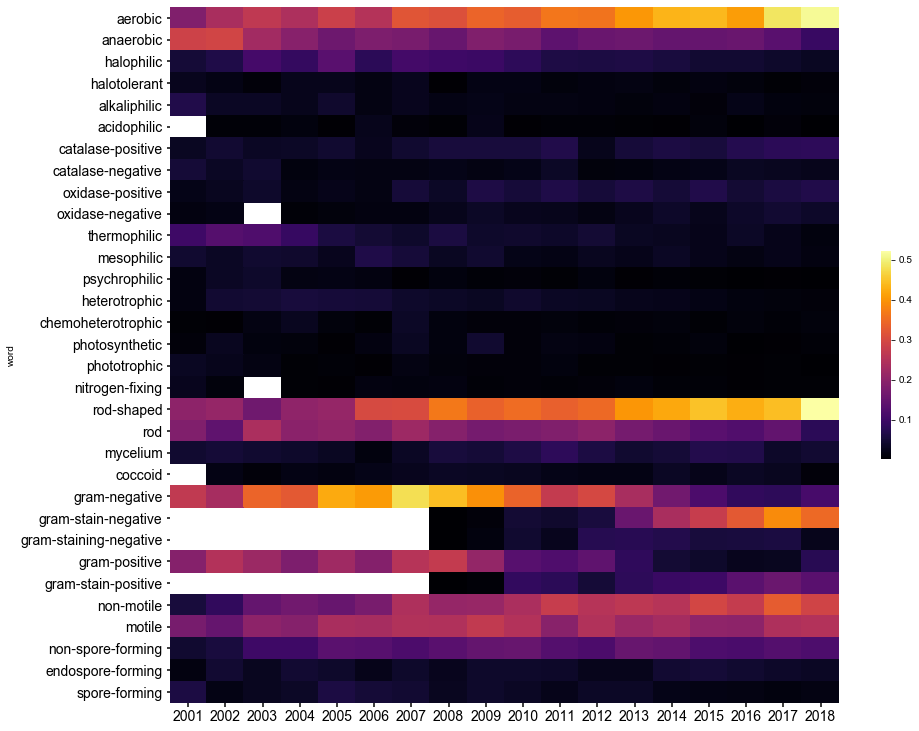

In [66]:
fig, ax = plt.subplots(figsize=(15,12.8))
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.heatmap(phenotype, cmap="inferno", cbar_kws = {"shrink": 0.3})
fig.savefig("characterization.svg")

# Tables containing absolute numbers

In [67]:
country_abs = df_final.loc[["china","korea","japan","india","taiwan","spain","antarctica","usa","thailand",
                              "russia","germany","iran","australia","mongolia","brazil","africa","france",
                              "tunisia","italy","algeria"]]
country_abs.to_csv("country_abs.csv", sep="\t")

In [68]:
marker_abs = df_final.loc[["rrna","gyrb","rpob","reca","atpd","rpoa","nifh","rpod","hsp60","hsp65","glnii",
                             "dnak","groel","nodc","atpa","infb","rrs","glta","ftsz","gyra", "recn"]]
marker_abs.to_csv("marker_abs.csv", sep="\t")

In [69]:
metabolism_abs = df_final.loc[["aerobic","anaerobic","halophilic","catalase-positive","oxidase-positive",
                                 "thermophilic","mesophilic","heterotrophic","oxidase-negative",
                                 "catalase-negative","alkaliphilic","halotolerant","photosynthetic",
                                 "chemoheterotrophic","nitrogen-fixing","psychrophilic","acidophilic",
                                 "phototrophic","chemolithoautotrophic","anaerobe","chemo-organotrophic",
                                 "methylotrophic","microaerophilic","neutrophilic","sulfur-oxidizing",
                                 "autotrophic","cellulolytic","methanogenic","aerobe","heterotroph"]]
metabolism_abs.to_csv("metabolism_abs.csv", sep="\t")

In [70]:
chemotaxonomic_abs = df_final.loc[["fatty","lipid","quinone","peptidoglycan","maldi-tof","polyamines"]]
chemotaxonomic_abs.to_csv("chemotaxonomic_abs.csv", sep="\t")

In [71]:
genomic_abs = df_final.loc[["gc","dna-dna","genome","ani","dddh","mlsa","whole-genome","ddh","ribotyping",
                              "dnadna","box-pcr","anib","ggd","aflp","mlst","gani"]]
genomic_abs.to_csv("genomic_abs.csv", sep="\t")

In [72]:
phenotypic_abs = df_final.loc[["physiological","biochemical","morphological","morphology","api","biolog"]]
phenotypic_abs.to_csv("phenotypic_abs.csv", sep="\t")

In [73]:
methods_type_abs = df_final.loc[["phylogenetic","phenotypic","chemotaxonomic","genomic","genotypic"]]
methods_type_abs.to_csv("methods_abs.csv", sep="\t")

In [74]:
site_abs = df_final.loc[["soil","sediment","sea","water","lake","seawater","plant","human","root","rhizosphere",
                         "forest","coast","ocean","freshwater","ginseng","deep-sea","wastewater","bay","river",
                         "hydrothermal","blood","desert","pond","mangrove","faeces","mountain","sand","saltern",
                         "vent","wetland"]]
site_abs.to_csv("site_abs.csv", sep="\t")

In [75]:
structure_abs = df_final.loc[["rod-shaped","gram-negative","non-motile","motile","rod","gram-stain-negative",
                              "non-spore-forming","gram-positive","gram-stain-positive","mycelium",
                              "endospore-forming","gram-staining-negative","spore-forming","coccoid",
                              "gram-reaction-negative","non-flagellated","ovoid","non-sporulating","filamentous",
                              "cocci","coccus-shaped","gram-staining-positive","non-gliding",
                              "non-endospore-forming","gram-reaction-positive","short-rod-shaped",
                              "gram-positive-staining","pleomorphic","coccus","nonmotile"]]
structure_abs.to_csv("structure_abs.csv", sep="\t")

# Tables containing relative numbers


In [76]:
#country
country_rel = relative.loc[["china","korea","japan","india","taiwan","spain","antarctica","usa","thailand",
                              "russia","germany","iran","australia","mongolia","brazil","africa","france",
                              "tunisia","italy","algeria"]]
country_rel.to_csv("country_rel.csv", sep="\t")

#marker
marker_rel = relative.loc[["rrna","gyrb","rpob","reca","atpd","rpoa","nifh","rpod","hsp60","hsp65","glnii",
                             "dnak","groel","nodc","atpa","infb","rrs","glta","ftsz","gyra", "recn"]]
marker_rel.to_csv("marker_rel.csv", sep="\t")

#metabolism
metabolism_rel = relative.loc[["aerobic","anaerobic","halophilic","catalase-positive","oxidase-positive",
                                 "thermophilic","mesophilic","heterotrophic","oxidase-negative",
                                 "catalase-negative","alkaliphilic","halotolerant","photosynthetic",
                                 "chemoheterotrophic","nitrogen-fixing","psychrophilic","acidophilic",
                                 "phototrophic","chemolithoautotrophic","anaerobe","chemo-organotrophic",
                                 "methylotrophic","microaerophilic","neutrophilic","sulfur-oxidizing",
                                 "autotrophic","cellulolytic","methanogenic","aerobe","heterotroph"]]
metabolism_rel.to_csv("metabolism_rel.csv", sep="\t")

#chemotaxonomic
chemotaxonomic_rel = relative.loc[["fatty","lipid","quinone","peptidoglycan","maldi-tof","polyamines"]]
chemotaxonomic_rel.to_csv("chemotaxonomic_rel.csv", sep="\t")

#genomic
genomic_rel = relative.loc[["gc","dna-dna","genome","ani","dddh","mlsa","whole-genome","ddh","ribotyping",
                              "dnadna","box-pcr","anib","ggd","aflp","mlst","gani"]]
genomic_rel.to_csv("genomic_rel.csv", sep="\t")

#phenotypic
phenotypic_rel = relative.loc[["physiological","biochemical","morphological","morphology","api","biolog"]]
phenotypic_rel.to_csv("phenotypic_rel.csv", sep="\t")

#methods
methods_type_rel = relative.loc[["phylogenetic","phenotypic","chemotaxonomic","genomic","genotypic"]]
methods_type_rel.to_csv("methods_rel.csv", sep="\t")

#site
site_rel = relative.loc[["soil","sediment","sea","water","lake","seawater","plant","human","root","rhizosphere",
                         "forest","coast","ocean","freshwater","ginseng","deep-sea","wastewater","bay","river",
                         "hydrothermal","blood","desert","pond","mangrove","faeces","mountain","sand","saltern",
                         "vent","wetland"]]
site_rel.to_csv("site_rel.csv", sep="\t")

#structure
structure_rel = relative.loc[["rod-shaped","gram-negative","non-motile","motile","rod","gram-stain-negative",
                              "non-spore-forming","gram-positive","gram-stain-positive","mycelium",
                              "endospore-forming","gram-staining-negative","spore-forming","coccoid",
                              "gram-reaction-negative","non-flagellated","ovoid","non-sporulating","filamentous",
                              "cocci","coccus-shaped","gram-staining-positive","non-gliding",
                              "non-endospore-forming","gram-reaction-positive","short-rod-shaped",
                              "gram-positive-staining","pleomorphic","coccus","nonmotile"]]
structure_rel.to_csv("structure_rel.csv", sep="\t")